In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [13]:
plt.style.use('seaborn-white')

In [14]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [15]:
path_to_data="../data/"
path_to_results="../results/"

In [16]:
plt_df=pd.read_csv(path_to_data+"Data_for_Figure4B_5D.tsv",sep="\t",index_col=0)
plt_df.head()

,CancerType,Sex,sTP53_mutdel,Gender_sTP53m,HRD_score,MSK_Sig3_ratio,HA_cases,GS_cases,GS_HA_anno,HRD_anno,rRPS_score,OV-GS_score,KEGG_score,MATH,KEGG_cell_cycle
P00001,THCA,Female,0.0,Female_TP53wt,0.0,6.256293e-02,0.0,0.0,nonHRD,nonHRD,-5.969060,0.474816,-0.647113,13.626,-1.031969
P00002,KRC,Male,1.0,Male_TP53m,7.0,1.532795e-09,0.0,0.0,nonHRD,nonHRD,2.617642,-0.853287,0.221427,21.512,0.475348
P00003,KRC,Male,0.0,Male_TP53wt,0.0,2.494077e-01,0.0,0.0,nonHRD,nonHRD,-3.297964,1.065972,0.103088,20.971,-0.590359
P00004,OV,Female,1.0,Female_TP53m,65.0,3.284791e-01,1.0,1.0,GS_HA,HRD,0.804289,2.277678,0.845197,77.497,0.174805
P00005,BRC,Female,0.0,Female_TP53wt,2.0,4.232678e-04,0.0,0.0,nonHRD,nonHRD,0.332021,-0.465424,-0.681447,82.367,-0.235707


In [17]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
groups2=["GS_HA","GS","HA","nonHRD"]
labels2=["GS&HA","GS","HA","nonHRD"]

Female_TP53m
1vs4 p=1.37e-02
2vs4 p=5.96e-04
3vs4 p=1.58e-01
123vs4 p=1.22e-04
Male_TP53m
1vs4 p=4.14e-01
2vs4 p=2.10e-03
3vs4 p=1.99e-01
123vs4 p=2.66e-03
Female_TP53wt
1vs4 p=8.96e-08
2vs4 p=6.21e-04
3vs4 p=4.80e-04
123vs4 p=6.15e-10
Male_TP53wt
1vs4 p=2.26e-06
2vs4 p=3.34e-15
3vs4 p=1.16e-04
123vs4 p=2.16e-21


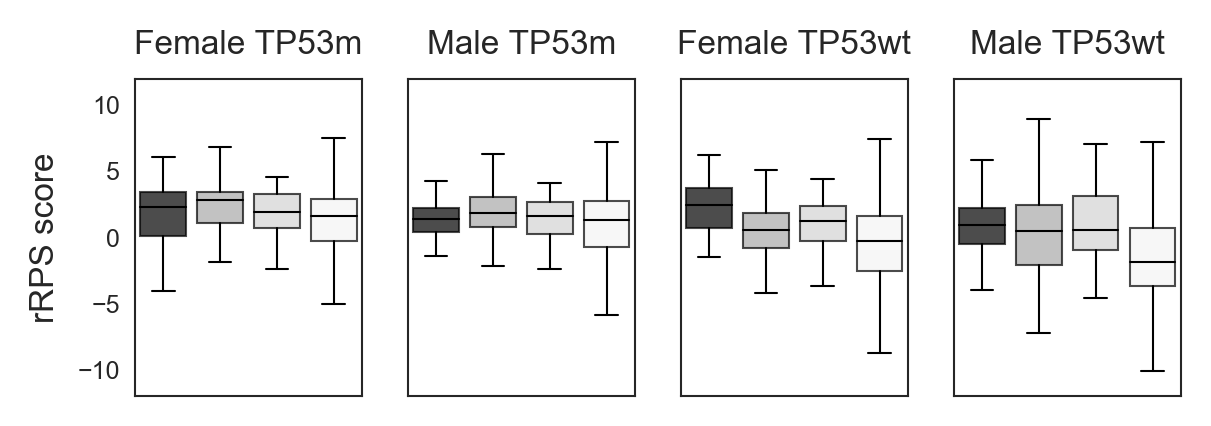

In [18]:
fig=plt.figure(figsize=(4.5,1.4))
value="rRPS_score"

for i,group in enumerate(groups) :
    ax=fig.add_subplot(1,4,i+1)
    tmp_df=plt_df[ plt_df["Gender_sTP53m"]==group]
    tmp_df=tmp_df[ tmp_df["CancerType"]!="OV"]
    order=["GS_HA","GS","HA","nonHRD"]
    sns.boxplot(x="GS_HA_anno",y=value, data=tmp_df,sym="",order=order,
                palette=["k","darkgrey","lightgrey","whitesmoke"]
                ,linewidth=0.5,boxprops={"alpha":0.7})
    ax.set_ylim(-12,12)
    ax.set_title(group.replace("_"," "),fontsize=8)
    ax.set_xlabel("",fontsize= 8)
    ax.set_ylabel("rRPS score",fontsize=8)
    
    a=tmp_df[tmp_df["GS_HA_anno"]=="GS_HA"][value].values
    b=tmp_df[tmp_df["GS_HA_anno"]=="GS"][value].values
    c=tmp_df[tmp_df["GS_HA_anno"]=="HA"][value].values
    d=tmp_df[tmp_df["GS_HA_anno"]=="nonHRD"][value].values
    e=np.concatenate( [a,b,c] )
    _,p=stats.mannwhitneyu(a,d)
    print(group)
    print("1vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(b,d)
    print("2vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(c,d)
    print("3vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(e,d)
    print("123vs4 p={:.2e}".format(p))
    
    if i in [1,2,3]:
        ax.set_ylabel("")
        ax.set_yticks([])
        
    ax.set_xlabel("")
    ax.set_xticks([])        
    ax.tick_params(labelsize=6)
      
plt.savefig(path_to_results+"Figure4B_1.png",bbox_inches="tight")

Female_TP53m
1vs4 p=2.03e-18
2vs4 p=6.65e-06
3vs4 p=9.92e-03
123vs4 p=4.37e-19
Male_TP53m
1vs4 p=7.52e-02
2vs4 p=1.91e-03
3vs4 p=1.42e-01
123vs4 p=4.73e-04
Female_TP53wt
1vs4 p=1.44e-06
2vs4 p=9.78e-09
3vs4 p=1.34e-03
123vs4 p=3.80e-14
Male_TP53wt
1vs4 p=6.14e-06
2vs4 p=1.84e-08
3vs4 p=1.12e-01
123vs4 p=1.65e-11


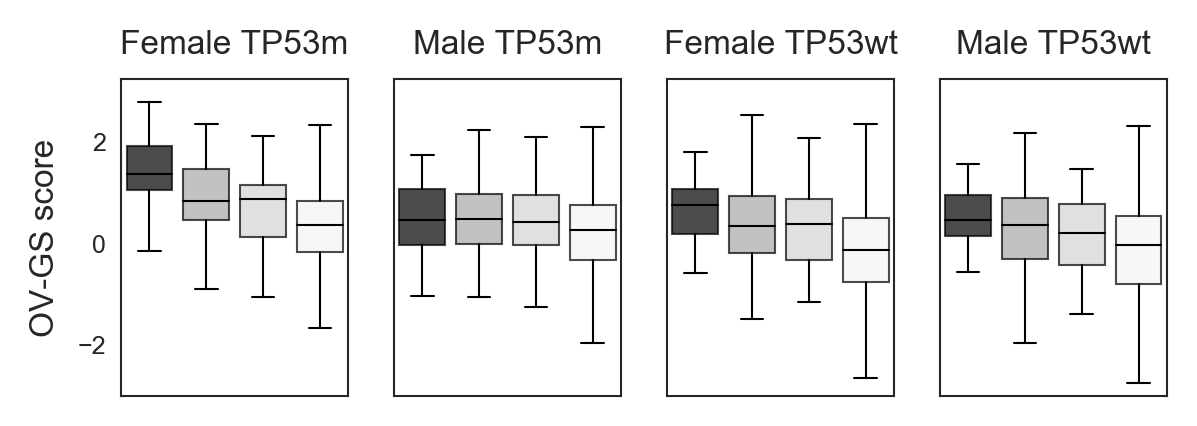

In [19]:
fig=plt.figure(figsize=(4.5,1.4))
value="OV-GS_score"

for i,group in enumerate(groups) :
    ax=fig.add_subplot(1,4,i+1)
    tmp_df=plt_df[ plt_df["Gender_sTP53m"]==group]
    tmp_df=tmp_df[ tmp_df["CancerType"]!="OV"]
    order=["GS_HA","GS","HA","nonHRD"]
    sns.boxplot(x="GS_HA_anno",y=value, data=tmp_df,sym="",order=order,
                palette=["k","darkgrey","lightgrey","whitesmoke"]
                ,linewidth=0.5,boxprops={"alpha":0.7})
    ax.set_ylim(-3,3.25)
    ax.set_title(group.replace("_"," "),fontsize=8)
    ax.set_xlabel("",fontsize= 8)
    ax.set_ylabel("OV-GS score",fontsize=8)
    
    a=tmp_df[tmp_df["GS_HA_anno"]=="GS_HA"][value].values
    b=tmp_df[tmp_df["GS_HA_anno"]=="GS"][value].values
    c=tmp_df[tmp_df["GS_HA_anno"]=="HA"][value].values
    d=tmp_df[tmp_df["GS_HA_anno"]=="nonHRD"][value].values
    e=np.concatenate( [a,b,c] )
    _,p=stats.mannwhitneyu(a,d)
    print(group)
    print("1vs4 p={:.2e}".format(p))

    _,p=stats.mannwhitneyu(b,d)
    print("2vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(c,d)
    print("3vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(e,d)
    print("123vs4 p={:.2e}".format(p))
    
    if i in [1,2,3]:
        ax.set_ylabel("")
        ax.set_yticks([])
        
    ax.set_xlabel("")
    ax.set_xticks([])        
    ax.tick_params(labelsize=6)
    
plt.savefig(path_to_results+"Figure4B_2.png",bbox_inches="tight")

Female_TP53m
1vs4 p=1.21e-02
2vs4 p=6.05e-02
3vs4 p=2.43e-01
123vs4 p=4.89e-03
Male_TP53m
1vs4 p=8.99e-02
2vs4 p=1.39e-04
3vs4 p=1.71e-02
123vs4 p=8.80e-06
Female_TP53wt
1vs4 p=1.84e-05
2vs4 p=1.21e-07
3vs4 p=4.21e-02
123vs4 p=2.15e-10
Male_TP53wt
1vs4 p=6.64e-06
2vs4 p=6.14e-24
3vs4 p=3.64e-03
123vs4 p=4.01e-28


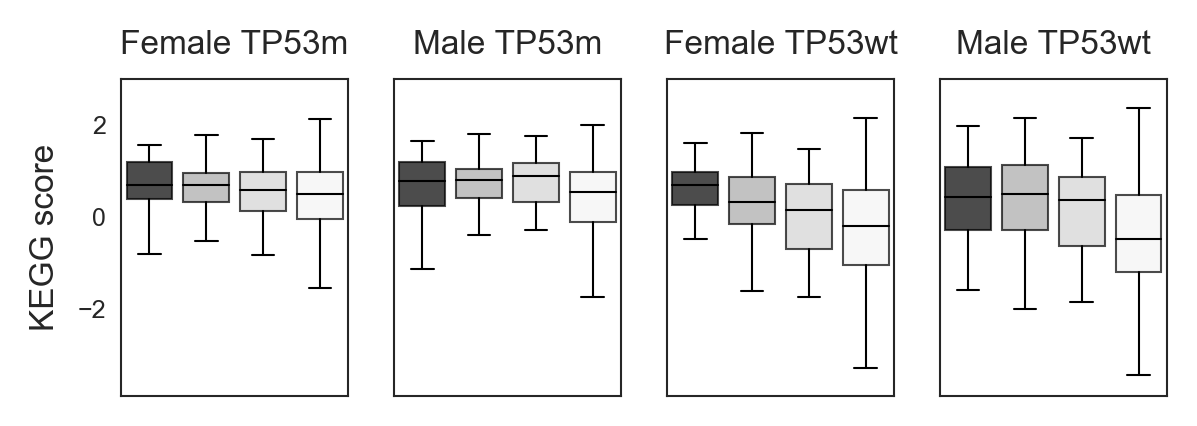

In [20]:
fig=plt.figure(figsize=(4.5,1.4))
value="KEGG_score"

for i,group in enumerate(groups) :
    ax=fig.add_subplot(1,4,i+1)
    tmp_df=plt_df[ plt_df["Gender_sTP53m"]==group]
    tmp_df=tmp_df[ tmp_df["CancerType"]!="OV"]
    order=["GS_HA","GS","HA","nonHRD"]
    sns.boxplot(x="GS_HA_anno",y=value, data=tmp_df,sym="",order=order,
                palette=["k","darkgrey","lightgrey","whitesmoke"]
                ,linewidth=0.5,boxprops={"alpha":0.7})
    ax.set_ylim(-3.9,3)
    ax.set_title(group.replace("_"," "),fontsize=8)
    ax.set_xlabel("",fontsize= 8)
    ax.set_ylabel("KEGG score",fontsize=8)
    
    a=tmp_df[tmp_df["GS_HA_anno"]=="GS_HA"][value].values
    b=tmp_df[tmp_df["GS_HA_anno"]=="GS"][value].values
    c=tmp_df[tmp_df["GS_HA_anno"]=="HA"][value].values
    d=tmp_df[tmp_df["GS_HA_anno"]=="nonHRD"][value].values
    e=np.concatenate( [a,b,c] )
    _,p=stats.mannwhitneyu(a,d)
    print(group)
    print("1vs4 p={:.2e}".format(p))

    _,p=stats.mannwhitneyu(b,d)
    print("2vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(c,d)
    print("3vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(e,d)
    print("123vs4 p={:.2e}".format(p))
    
    if i in [1,2,3]:
        ax.set_ylabel("")
        ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_xticks([])        
    ax.tick_params(labelsize=6)
    
plt.savefig(path_to_results+"Figure4B_3.png",bbox_inches="tight")

Male_TP53wt
1vs4 p=1.62e-16
2vs4 p=4.32e-20
3vs4 p=9.84e-04
123vs4 p=2.07e-32
Male_TP53wt
1vs4 p=2.33e-26
2vs4 p=8.89e-37
3vs4 p=1.38e-07
123vs4 p=9.22e-61


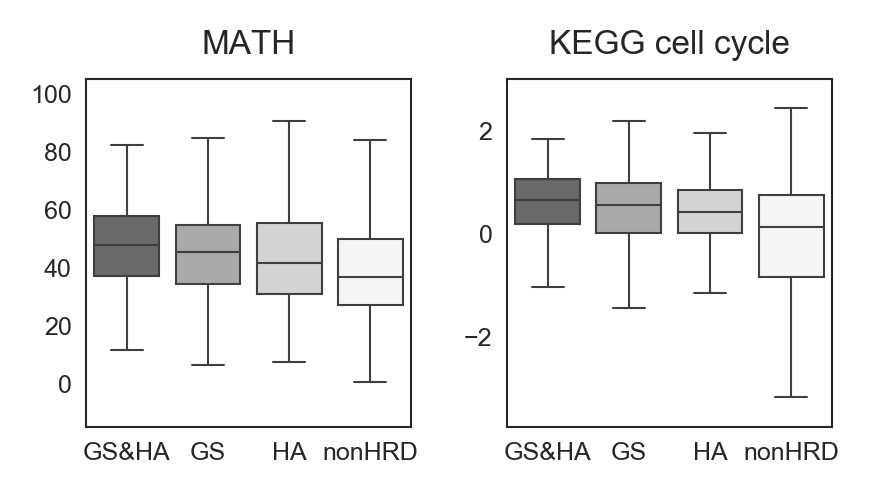

In [21]:
values=["MATH","KEGG_cell_cycle"]
cat="GS_HA_anno"
tmp_df=plt_df
hue="HRD_anno"
n=len(values)
fig = plt.figure(figsize=(3,1.75))
for i,value in enumerate(values):
    ax=fig.add_subplot(1,n,i+1)
    ax=sns.boxplot(x=cat,y=value,data=tmp_df,sym="",#hue=hue,hue_order=["HRD","nonHRD"],
                   order=groups2,palette=["dimgrey","darkgrey","lightgrey","whitesmoke"] ,linewidth=0.5,boxprops={"alpha":1})
    ax.set_title(value.replace("_"," "),fontsize=8)
    ax.set_xlabel("")
    ax.set_ylabel("",fontsize=8)
    ax.set_xticklabels(labels2,fontsize=6)
    ax.tick_params(axis="y",labelsize=6)
    ax.legend([])

    a=tmp_df[tmp_df["GS_HA_anno"]=="GS_HA"][value].values
    b=tmp_df[tmp_df["GS_HA_anno"]=="GS"][value].values
    c=tmp_df[tmp_df["GS_HA_anno"]=="HA"][value].values
    d=tmp_df[tmp_df["GS_HA_anno"]=="nonHRD"][value].values
    e=np.concatenate( [a,b,c] )
    _,p=stats.mannwhitneyu(a,d)
    print(group)
    print("1vs4 p={:.2e}".format(p))

    _,p=stats.mannwhitneyu(b,d)
    print("2vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(c,d)
    print("3vs4 p={:.2e}".format(p))
    _,p=stats.mannwhitneyu(e,d)
    print("123vs4 p={:.2e}".format(p))
    
    if i ==0:
        ax.set_ylim(-15,105)
    if i ==1:
        ax.set_ylim(-3.75,3)
    
plt.tight_layout()
plt.savefig(path_to_results+"Figure5D_1.png",bbox_inches="tight")

MATH Female_TP53m p= 4.09e-13
MATH Male_TP53m p= 9.86e-07
MATH Female_TP53wt p= 1.07e-05
MATH Male_TP53wt p= 1.28e-09
KEGG_cell_cycle Female_TP53m p= 4.01e-22
KEGG_cell_cycle Male_TP53m p= 6.81e-08
KEGG_cell_cycle Female_TP53wt p= 3.26e-12
KEGG_cell_cycle Male_TP53wt p= 6.00e-26


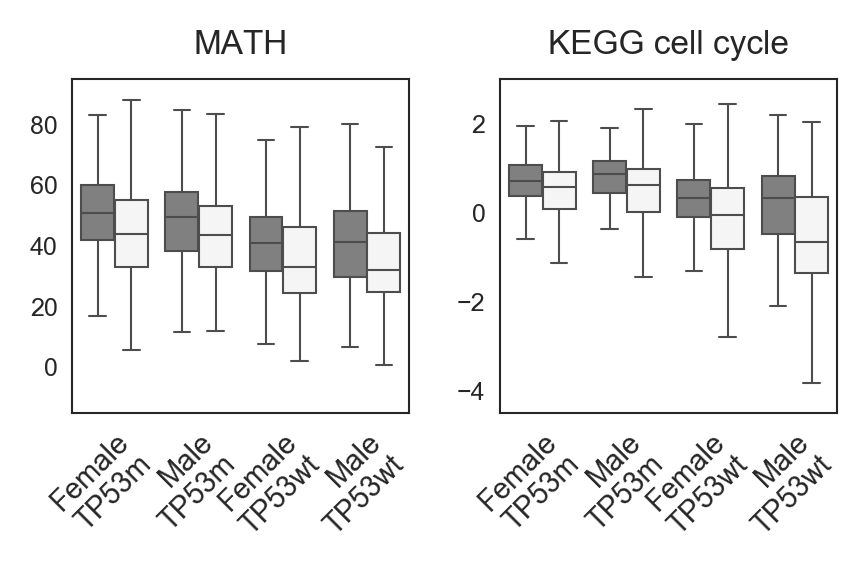

In [11]:
values=["MATH","KEGG_cell_cycle"]
cat="Gender_sTP53m"
tmp_df=plt_df
hue="HRD_anno"
n=len(values)
fig = plt.figure(figsize=(3,2))
for i,value in enumerate(values):
    ax=fig.add_subplot(1,n,i+1)
    ax=sns.boxplot(x=cat,y=value,data=tmp_df,sym="",hue=hue,hue_order=["HRD","nonHRD"],
                   order=groups,palette=["grey","whitesmoke"] ,linewidth=0.5,boxprops={"alpha":1})
    
    ax.set_title(value.replace("_"," "),fontsize=8)
    ax.set_xlabel("")
    ax.set_ylabel("",fontsize=8)
    labels3=['Female\nTP53m', 'Male\nTP53m', 'Female\nTP53wt', 'Male\nTP53wt']
    ax.set_xticklabels(labels3, fontsize=7,rotation=45,rotation_mode="anchor",ha="right")
    ax.tick_params(axis="y",labelsize=6)
    ax.legend([])
    
    for group in groups:
        tmp_df2=tmp_df[tmp_df[cat]==group]
        a=tmp_df2[tmp_df2[hue]=="HRD"][value].values
        b=tmp_df2[tmp_df2[hue]=="nonHRD"][value].values
        _,p=stats.mannwhitneyu(a,b)
        print(value, group, "p= {:.2e}".format(p))
    
    if i ==0:
        ax.set_ylim(-15,95)
    if i ==1:
        ax.set_ylim(-4.5,3)
    
plt.tight_layout()
plt.savefig(path_to_results+"Figure5D_2.png",bbox_inches="tight")